# 군집분석

### 군집분석은 각 개체의 유사성을 측정하여 유사성이 높은 대상 집단을 분류하고 군집에 속한 객체들의 유사성과 서로 다른 군집에 속한 객체간의 상이성을 규명하는 분석 방법
### 특성에 따라 고객을 여러 개의 배타적인 집단으로 나눌 수 있다.
### 결과는 구체적인 군지분석 방법에 따라 차이가 나타날 수 있다.
### 군집의 개수나 구조에 대한 가정 없이 데이터들 사이의 거리를 기준으로 군집화를 유도한다.


### 종류
1. 계층적 군집(Hierarchical Clustering)
- 합병형(군집간 거리 척도/연결법) : 최단연결법, 최장연결법, 평균연결법, 중심연결법, 와드연결법
- 분리형 : 다이아나 방법

2. 분할적 군집(Partitional Clustering)

- 프로토 타입 : K-중심 군집, 퍼지군집
- 분포기반 : 혼합분포군집
- 밀도기반 : 중심밀도 군집

### 거리계산 함수

#### 1. 연속형 변수
- 유클리디안 거리 : 데이터간의 유사성 측정, 변수들의 산포 정도가 전혀 감안되지 않음
- 표준화 거리 : 표준편차로 척도 변환한 후 유클리디안 거리 계산하며 척도 및 분산의 차이로 인한 왜곡을 피할 수 있다
- 마할로노비스 거리 : 변수들의 산포를 고려한 표준화 거리로 두 벡터 사이의 거리를 표본공분산으로 나눠주어야 하며 그룹에 대한 사전 지식 없이는 표본공분산을 계산할 수 없다.
- 체비셰프 거리 : 최대 거리
- 맨하탄 거리 : 절대값을 활용한 것으로 격자를 생각하면 됨
- 켄버라 거리 
- 민코우스키 거리 : 맨하탄 거리와 유클리디안 거리를 한번에 표현한 것으로 L1(맨하탄), L2(유클리디안)


#### 2. 범주형 변수
- 자카드 거리
- 자카드 계수
- 코사인 거리
- 코사인 유사도

In [24]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.neighbors import DistanceMetric
# 위 패키지에서 라이브러리 보면 여러 종류가 있음

In [25]:
x1 = [1,3,5,67,23,514]
x2 = [23,534,123,45,99,7]

In [34]:
euc = distance.euclidean(x1, x2) # 유클리디안
cbs = distance.chebyshev(x1, x2) # 체비셰프
cbr = distance.canberra(x1, x2) # 캔버라
cs = distance.cosine(x1, x2) # 코사인
jcd = distance.jaccard(x1, x2) # 자카드
mks = distance.minkowski(x1, x2) # 민코우스키

In [35]:
print(euc)
print(cbs)
print(cbr)
print(cs)
print(jcd)
print(mks)

748.1163011190172
531
4.619876472258196
0.9616414825826467
1.0
748.1163011190172


***

## 1. 계층적 군집분석

### N개의 군집으로 시작해 점차 군집의 개수를 줄여 나가는 방법


In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
data = pd.read_csv("/Users/kisehyun/Downloads/나/국민대/프로그래밍/19다변량/dataset/성인대표팀.csv", encoding = 'cp949')

In [52]:
data.head()

,선수,포지션,출전경기,득점,선발출전,슈팅,골성공률,교체출전,유효슈팅,풀타임,...,퇴장,어시스트,크로스성공률,크로스횟수,킬패스횟수,돌파횟수,경합성공률,태클횟수,가로채기횟수,패스차단횟수
0,강민수,DF,33,0,29,8,0.00,4,1,27,...,1,0,0.00,2,0,1,0.58,64,70,182
1,강철,DF,18,1,15,13,0.08,3,3,12,...,0,1,0.39,41,1,1,0.50,54,34,67
2,고기구,FW,3,0,1,4,0.00,2,0,1,...,0,1,0.00,1,0,0,0.40,6,1,0
3,고명진,MF,3,0,1,1,0.00,2,0,1,...,0,1,0.00,3,0,0,0.00,7,3,1
4,고무열,FW,2,0,0,1,0.00,2,0,0,...,0,0,0.00,1,0,1,0.00,0,0,1


In [53]:
data = data[data.출전경기 >= 60]
data.set_index(data.선수, inplace = True)

In [54]:
data.head()

,선수,포지션,출전경기,득점,선발출전,슈팅,골성공률,교체출전,유효슈팅,풀타임,...,퇴장,어시스트,크로스성공률,크로스횟수,킬패스횟수,돌파횟수,경합성공률,태클횟수,가로채기횟수,패스차단횟수
선수,,,,,,,,,,,,,,,,,,,,,
구자철,구자철,MF,70,18,48,112,0.16,22,44,17,...,0,5,0.28,40,13,29,0.48,125,86,115
기성용,기성용,MF,102,9,98,159,0.06,4,51,59,...,0,17,0.38,45,22,38,0.47,236,232,223
김남일,김남일,MF,74,1,58,61,0.02,16,14,35,...,0,4,0.41,29,14,11,0.44,253,177,228
김영권,김영권,DF,63,3,61,31,0.10,2,12,55,...,0,1,0.18,17,3,13,0.63,67,163,248
김정우,김정우,MF,67,6,51,79,0.08,16,20,28,...,2,6,0.45,20,3,11,0.54,271,138,192


#### 1-1) 최단 연결법 - 가장 가까운 데이터를 묶어서 군집을 형성

In [55]:
linked = linkage(data.iloc[:, 2:], 'ward')

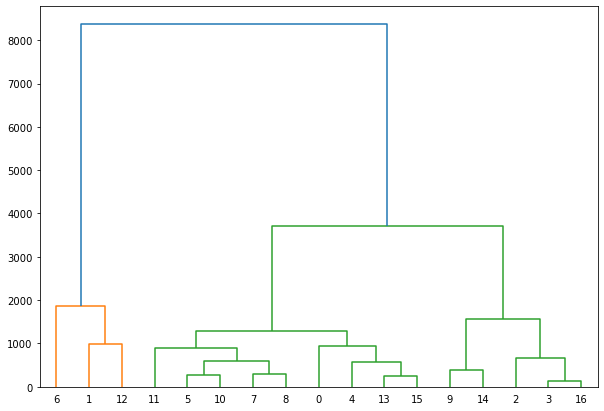

In [65]:
plt.figure(figsize=(10, 7))
dendrogram(linked, leaf_rotation=0,
           leaf_font_size=10)
plt.show()

In [66]:
cut_tree = fcluster(linked, t = 3, criterion = 'distance')

In [71]:
cut_tree_df = pd.DataFrame({'pred' : list(cut_tree), 'name' : data.index.tolist()})

In [72]:
cut_tree_df

,pred,name
0,12,구자철
1,1,기성용
2,17,김남일
3,15,김영권
4,11,김정우
5,4,박주영
6,3,박지성
7,6,설기현
8,7,손흥민
9,13,유상철


#### 단위가 너무 다르면 스케일링 필요
***
#### 1-2) 최장 연결법 - 최장거리를 거리로 계산하여 거리행렬을 수정

In [78]:
linked = linkage(data.iloc[:, 2:], 'complete')

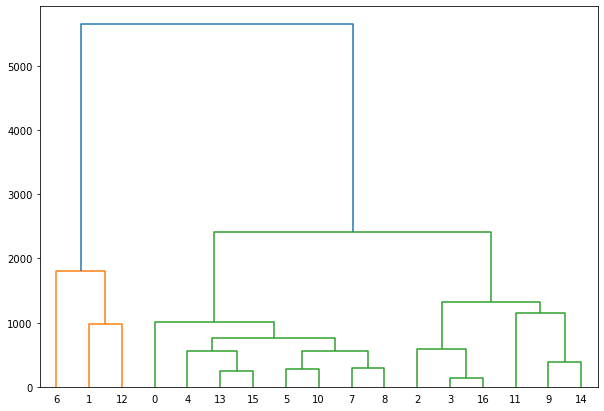

In [80]:
plt.figure(figsize=(10, 7))
dendrogram(linked, leaf_rotation=0,
           leaf_font_size=10)
plt.show()

In [81]:
cut_tree = fcluster(linked, t = 3, criterion = 'distance')

In [82]:
cut_tree_df = pd.DataFrame({'pred' : list(cut_tree), 'name' : data.index.tolist()})

In [83]:
cut_tree_df

,pred,name
0,11,구자철
1,1,기성용
2,14,김남일
3,12,김영권
4,6,김정우
5,7,박주영
6,3,박지성
7,9,설기현
8,10,손흥민
9,15,유상철



***
#### 1-2) 평균 연결법 - 평균거리를 거리로 계산하여 거리행렬을 수정

In [96]:
linked = linkage(data.iloc[:, 2:], 'average')

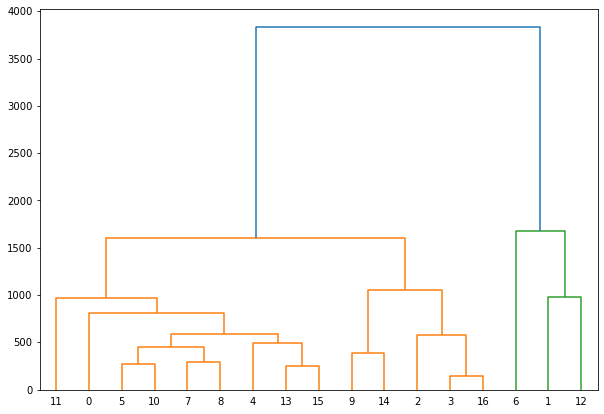

In [97]:
plt.figure(figsize=(10, 7))
dendrogram(linked, leaf_rotation=0,
           leaf_font_size=10)
plt.show()

In [106]:
cut_tree = fcluster(linked, t = 750, criterion = 'distance') # y를 750에서 선그어서 군집화

In [107]:
cut_tree_df = pd.DataFrame({'pred' : list(cut_tree), 'name' : data.index.tolist()})

In [108]:
cut_tree_df

,pred,name
0,2,구자철
1,6,기성용
2,5,김남일
3,5,김영권
4,1,김정우
5,1,박주영
6,8,박지성
7,1,설기현
8,1,손흥민
9,4,유상철


***
#### 1-3) 와드연결법 - 편차들의 제곱합을 고려 / 군집 간 정보의 손실을 최소화

In [94]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
data['클러스터'] = cluster.fit_predict(data.iloc[:, 2:])

In [95]:
data[['선수', '클러스터']]

,선수,클러스터
선수,,
구자철,구자철,2
기성용,기성용,0
김남일,김남일,1
김영권,김영권,1
김정우,김정우,2
박주영,박주영,2
박지성,박지성,0
설기현,설기현,2
손흥민,손흥민,2


***

## 2. 비계층적 군집분석
### n개의 개체를 g개의 군집으로 나눌 수 있는 모든 가능한 방법을 점검해 최적화한 군집을 형성하는 것

## 2-1) k-means 군집 분석 : 주어진 데이터를 k개의 군집으로 묶는 알고리즘으로 각 클러스터와 거리 차이의 분산을 최소화 하는 방식으로 작동

- 초기 중심 값은 임의로 선택이 가능하며 초기 중심값의 선정에 따라 결과가 달라질 수 있다.
- 탐욕적 알고리즘으로 안정된 군집은 보장하지만 최적이라는 보장은 없다.

#### 장점
- 알고리즘이 단순하며 빠르게 수행 가능
- 계층적 방법에 비해 많은 양의 데이터를 다룰 수 있다.
- 내부 구조에 대한 사전 정보가 없어도 된다.
- 다양한 형태의 데이터에 적용이 가능

#### 단점
- 군집의 수, 가중치와 거리 정의가 어렵다.
- 사전에 주어진 목적이 없어 해석이 어렵다.
- 잡음이나 이상치에 영향을 받는다.
- 볼록한 형태가 아닌 (non-convex)군집이 존재할 경우 성능이 떨어진다.
- 초기 군집수 결정이 어렵다.


In [109]:
from sklearn.cluster import KMeans

In [114]:
df = pd.read_csv("//Users/kisehyun/Downloads/나/ADP실기/PART 05 실습용 데이터/credit_final.csv")

In [116]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [119]:
km = KMeans(n_clusters = 2, random_state = 1210).fit(df)

In [121]:
pd.Series(km.labels_).value_counts()

0    827
1    173
dtype: int64

#### inertia = 각 중심점에서 군집의 데이타간의 거리를 합산한 것으로 군집의 응집도를 나타낸다. 이 값이 작을수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다.

In [128]:
cls_n = range(1, 11)
inertia_list = []

In [129]:
for k in cls_n :
    model = KMeans(n_clusters = k, random_state = 326).fit(df)
    inertia_list.append(model.inertia_)

In [130]:
inertia_list

[7960244771.306998,
 2405510983.3962708,
 1278228879.2111826,
 649918512.644457,
 469513438.9089386,
 317779660.0376514,
 232727641.20274886,
 181578917.66569152,
 148468111.2055401,
 116518642.91961952]

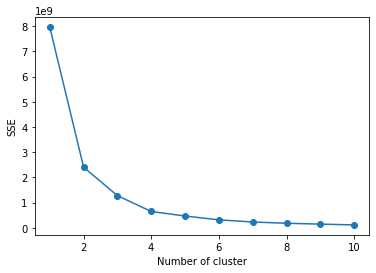

In [131]:
plt.figure()
plt.plot(cls_n, inertia_list, marker = 'o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

- 군집의 수를 4로 결정하는 것이 바람직해 보인다.
***

## 3. 평균 이동(Mean Shift)

#### 평균이동은 k-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다. 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동한다.
#### 주어진 모델의 확률 밀도 함수를 찾기 위해 KDE(kernel nebsity estimation)를 이용한다.

#### 평균이동은 군집의 개수를 지정할 필요가 없기 때문에 대역폭 크기를 어떤 값으로 지정하냐에 따라 군집화의 품질이 결정된다.

In [221]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs

In [222]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아진다.

In [223]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


estimate_bandwidth는 최적화된 bandwidth 값을 반환한다.

In [224]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.2)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.444


In [225]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.2)

meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


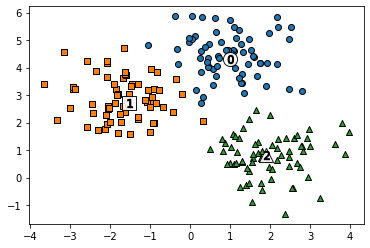

In [226]:
clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

평균이동의 장점은 좀 더 유연한 군집화가 가능하다는 것이다. 또한 이상치의 영향력도 크지 않으며 미리 군집의 개수를 지정할 필요도 없다. 하지만 수행시간 이오래 걸리고 bandwidth의 크기에 따른 군집화 영향도가 매우 크다.
***

## 3. 혼합분포군집

### 모형 기반의 군집방법으로 데이터 k개의 모수적 모형(흔히 정규분포 또는 다변량 정규분포를 가정함)의 가중합으로 표현되는 모집단 모형으로부터 나왔다는 가정하에서 모수와 함께 가중치를 자료로부터 추정하는 방법

### k개의 각 모형은 군집을 의미하며 각 데이터는 추정된 k개의 모형 중 어느 모형으로부터 나왔을 확률이 높은지에 따라 군집의 분류가 이루어진다.

### 흔히 혼합모형에서의 모수와 가중치의 추정(최대가능도추정)에는 **EM 알고리즘**이 사용된다.

### 특징
- 확률분포를 도입하여 군집화를 수행
- 서로 다른 크기나 모양의 군집을 찾을 수 있다.
- EM알고리즘을 이용하기 때문에 데이터가 커지면 수렴에 시간이 걸릴 수 있다.
- 군집의 크기가 너무 작으면 추정의 정도가 떨어지거나 어려울 수 있다.
- 이상치 자료에 민감하므로 사전에 조치가 필요하다.


## 3-1. GMM
### 개별 데이터가 어느 정규 분포에 속하는지 결정하는 방식

In [132]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

In [142]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

In [143]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [144]:
gmm = GaussianMixture(n_components = 3, random_state = 326).fit(df)

In [145]:
labels = gmm.predict(df)

In [146]:
df['cls'] = labels

In [147]:
pd.crosstab(df.cls, df.target)

target,0,1,2
cls,,,
0,50,0,0
1,0,0,50
2,0,50,0


#### 모든 클래스에 정확히 50개씩 할당되어 군집화가 잘 된 것을 알 수 있다.
***

## 3-2. DBSCAN

### 밀도 기반 군집화 기법으로 데이터의 분포가 기하학적으로 복잡한 데이터에도 효과적인 군집화가 가능합니다. 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어 복잡한 데이터에도 군집화를 잘 수행한다.

#### 가장 중요한 두 파라미터는 'eps(입실론)' 과 'min_points'이다.

- eps : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- min_samples : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수(min_points + 1)



In [148]:
from sklearn.cluster import DBSCAN

In [149]:
dbscan = DBSCAN(eps = .5, min_samples = 7, metric = 'euclidean')

In [150]:
db_labels = dbscan.fit_predict(df)

In [152]:
df['db_cls'] = db_labels

In [232]:
pd.crosstab(df.db_cls, df.target)

target,0,1,2
db_cls,,,
-1,2,6,17
0,48,0,0
1,0,44,0
2,0,0,33


#### 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미한다. 

#### 일반적으로 eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아진다. min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 된다.
***

## 3-3. OPTICS

### OPTICS는 군집화 구조 식별을 위해 부가적 순서를 생성하는 기법

In [227]:
from sklearn.cluster import OPTICS

In [230]:
optics = OPTICS(metric = 'euclidean', min_samples = 3)

In [235]:
df['optics_cls'] = optics.fit_predict(df)

In [236]:
pd.crosstab(df.optics_cls, df.target)

target,0,1,2
optics_cls,,,
-1,33,29,25
0,10,0,0
1,7,0,0
2,0,4,0
3,0,0,4
4,0,5,0
5,0,3,0
6,0,5,0
7,0,4,0


#### 상당히 많은 수의 데이터가 잘못 할당 된 것을 알 수 있다.

***
#### 군집화는 지도학습이 아니기 때문에 정확하게 성능을 평가하기 어렵다. 
#### 실루엣 분석을 활용하여 군집화 평가


### 실루엣 분석
- 각 군집간의 거리가 얼마나 효율적으로 분리돼 있는지 나타낸다.
- 개별 데이터가 가지는 실루엣 계수는 각 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화 되어 있고 다른 군집에 있는 데이터와는 얼마나 멀리 떨어져 있는지 나타낸다.
- -1에서 1 사이의 값을 가지며 1에 가까울수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가깝다는 의미
- -는 아예 다른 군집에 데이터가 할당됐음을 의미
- 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균과 큰 차이가 나지 않는 것이 중요하다.
- 만약 전체 실루엣 계수의 평균은 높지만 특정 군집의 계수 평균만 높고 다른 군집들은 낮으면 좋은 군집화 조건이 아님.

***

## 4. 실습 적용

In [171]:
import datetime as dt
from sklearn.preprocessing import StandardScaler

In [133]:
data = pd.read_excel('Online Retail.xlsx')

In [134]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [138]:
data = data[(data.Quantity > 0) & (data.UnitPrice > 0) & (data.CustomerID.notnull()) & (data.Country == 'United Kingdom')]

In [139]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [140]:
data.shape[0]

354321

### RFM 기반 데이터 전처리

In [155]:
data['sale_amount'] = data['Quantity'] * data['UnitPrice']

<ipython-input-155-946e872c6958>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sale_amount'] = data['Quantity'] * data['UnitPrice']


In [156]:
data['CustomerID'] = data['CustomerID'].astype(int)

<ipython-input-156-6d49cfbb3031>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustomerID'] = data['CustomerID'].astype(int)


In [161]:
cust_df = data.groupby('CustomerID').agg({'InvoiceDate' : 'max', 'InvoiceNo' : 'count', 'sale_amount' : 'sum'})

In [162]:
cust_df.head()

,InvoiceDate,InvoiceNo,sale_amount
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [163]:
cust_df.columns = ['Recency', 'Frequency', 'Monetary']

In [165]:
cust_df = cust_df.reset_index()

In [168]:
cust_df.Recency = dt.datetime(2011, 12, 10) - cust_df.Recency

In [170]:
cust_df.Recency = cust_df.Recency.apply(lambda x : x.days + 1)

In [173]:
scaler = StandardScaler()

In [174]:
scaled_df = scaler.fit_transform(cust_df[['Recency', 'Frequency', 'Monetary']])

In [178]:
km = KMeans(n_clusters = 3, random_state = 326)
km_labels = km.fit_predict(scaled_df)

gmm = GaussianMixture(n_components = 3, random_state = 326)
gmm_labels = gmm.fit_predict(scaled_df)

In [185]:
cust_df['km클러스터'] = km_labels
cust_df['gmm클러스터'] = gmm_labels

In [179]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [189]:
km_sil_score = silhouette_samples(scaled_df, km_labels)

In [192]:
gmm_sil_score = silhouette_samples(scaled_df, gmm_labels)

In [190]:
cust_df['km실루엣계수'] = km_sil_score

In [193]:
cust_df['gmm실루엣계수'] = gmm_sil_score

In [191]:
cust_df.groupby('km클러스터').km실루엣계수.mean()

km클러스터
0    0.595770
1    0.594515
2   -0.026289
Name: km실루엣계수, dtype: float64

In [194]:
cust_df.groupby('gmm클러스터').gmm실루엣계수.mean()

gmm클러스터
0    0.394929
1    0.062156
2   -0.271934
Name: gmm실루엣계수, dtype: float64

#### 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

In [212]:
def visualize_silhouette(cluster_list, X) : 
    import matplotlib.cm as cm
    import math
    range_n_clusters = [2, 3, 4, 5, 6]

    for n_cluster in cluster_list :

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_cluster + 1) * 10])
        clusterer = KMeans(n_clusters = n_cluster, random_state = 326)
        cluster_labels = clusterer.fit_predict(X)


        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_cluster,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_cluster):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_cluster),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5666305694457564
For n_clusters = 3 The average silhouette_score is : 0.5924537813510861
For n_clusters = 4 The average silhouette_score is : 0.5950344972510845
For n_clusters = 5 The average silhouette_score is : 0.6164139014342273


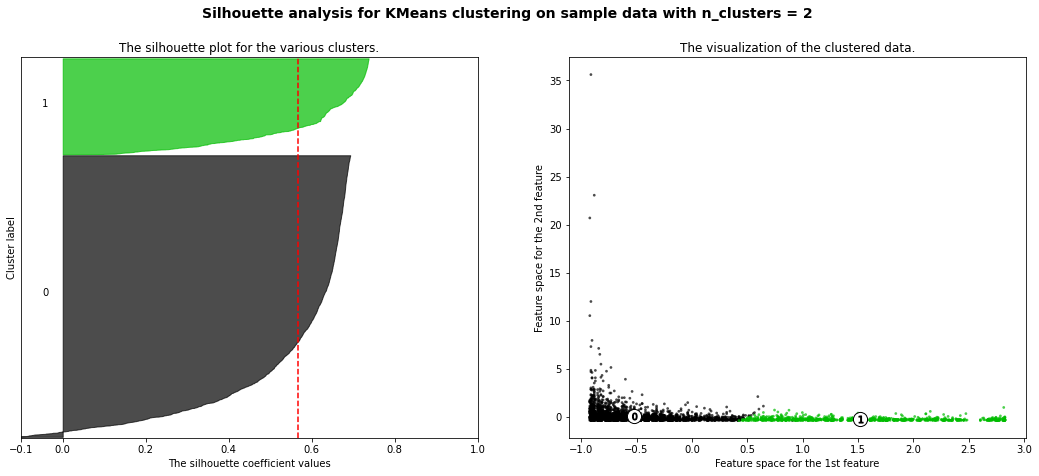

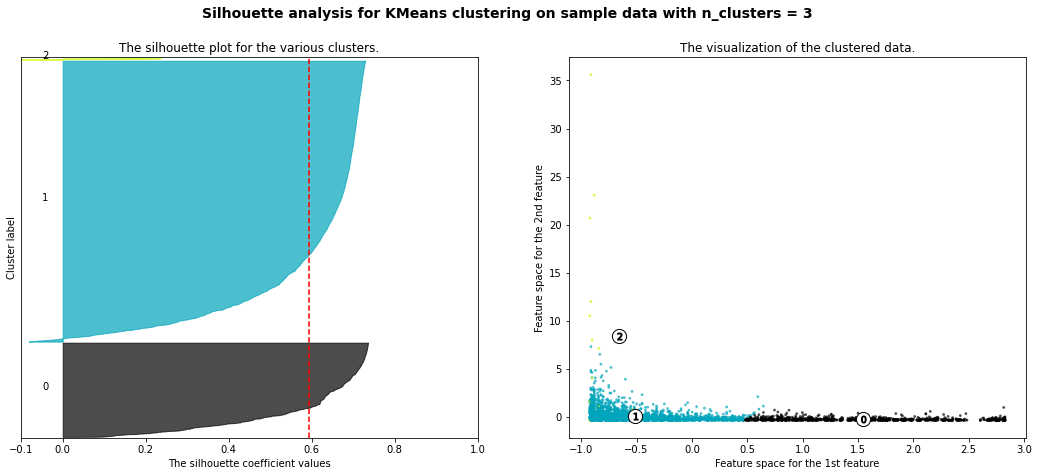

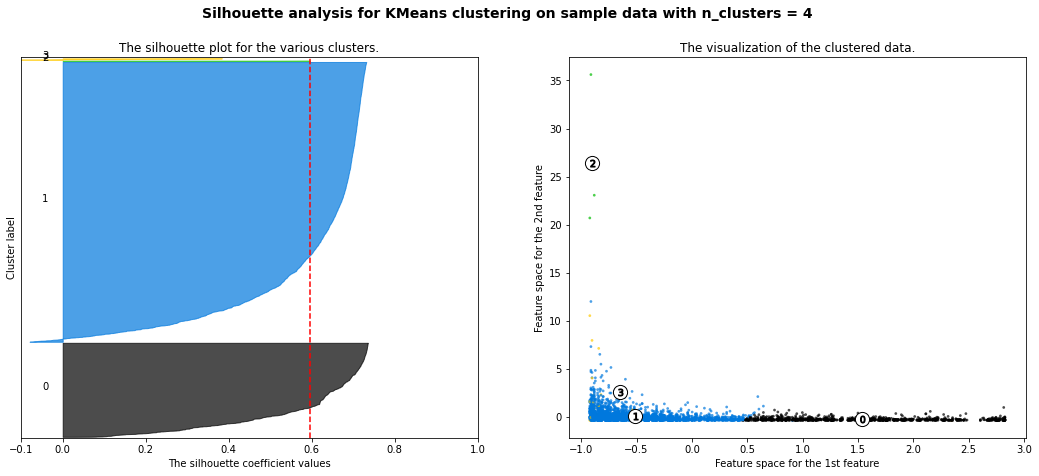

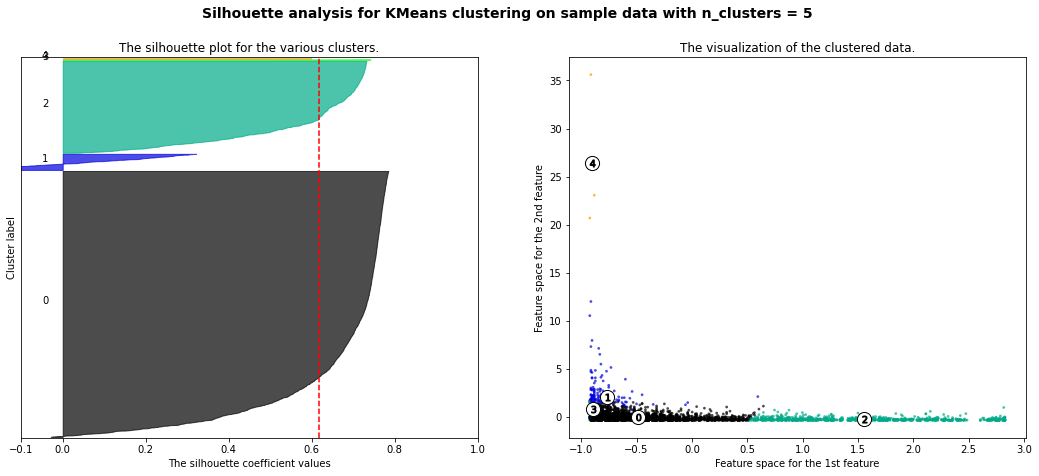

In [213]:
visualize_silhouette([2,3,4,5], scaled_df)

In [214]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5666305694457564
For n_clusters = 3 The average silhouette_score is : 0.5924537813510861
For n_clusters = 4 The average silhouette_score is : 0.5950344972510845
For n_clusters = 5 The average silhouette_score is : 0.6164139014342273


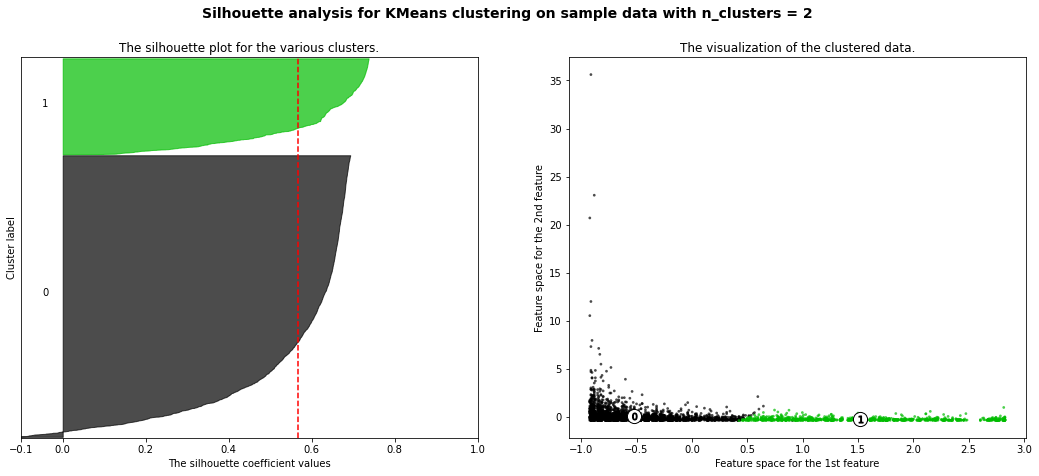

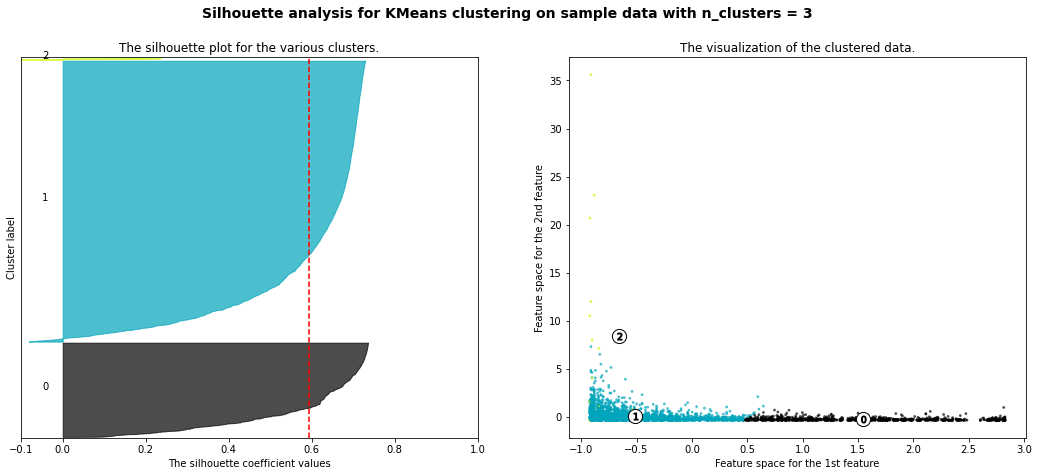

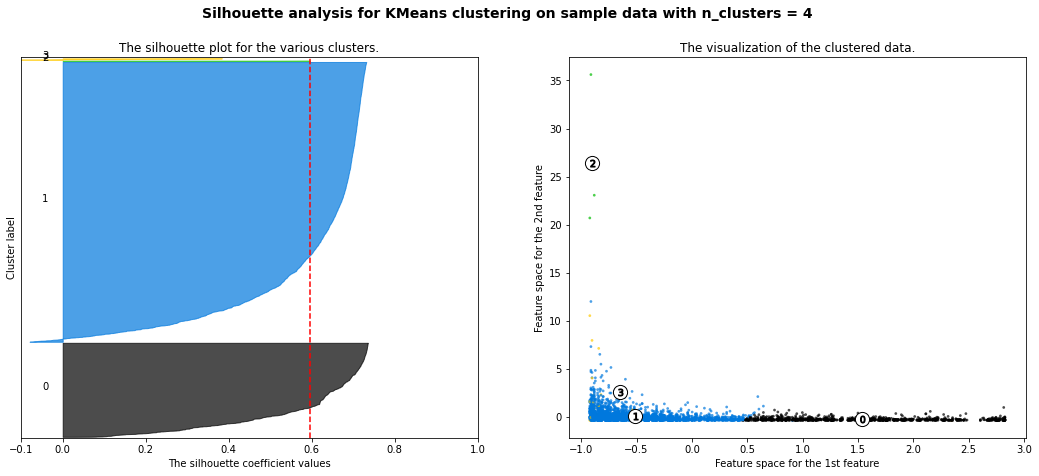

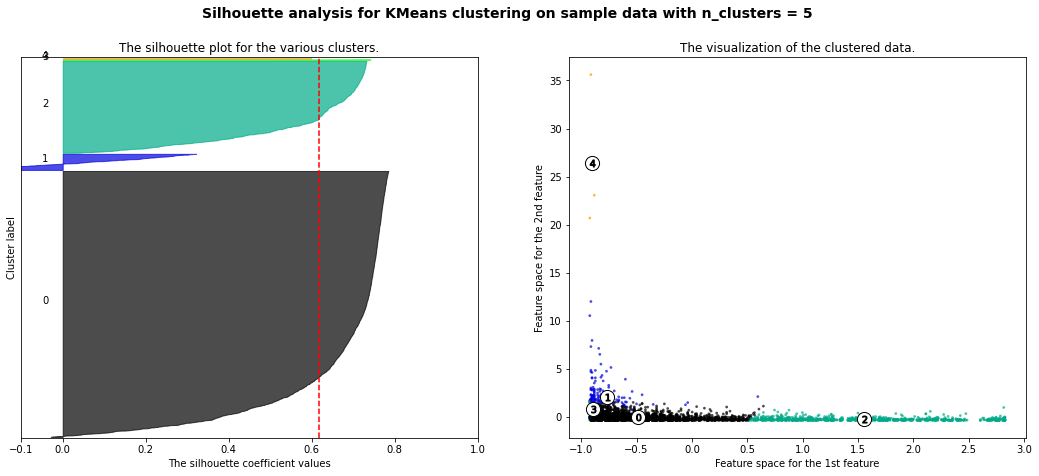

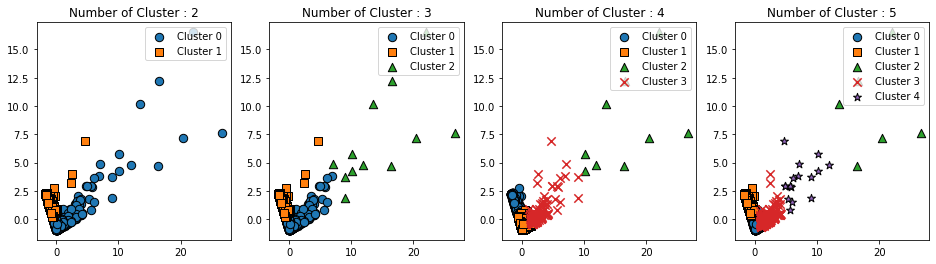

In [215]:
visualize_silhouette([2,3,4,5],scaled_df)
visualize_kmeans_plot_multi([2,3,4,5],scaled_df)

#### 데이터의 왜곡 정도가 심한 경우 로그변환을 취하면 개선이 가능하다.

In [216]:
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

In [217]:
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

In [218]:
kmeans = KMeans(n_clusters=3, random_state=326)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

For n_clusters = 2 The average silhouette_score is : 0.4000433430356038
For n_clusters = 3 The average silhouette_score is : 0.3031672668045423
For n_clusters = 4 The average silhouette_score is : 0.30606173217560745
For n_clusters = 5 The average silhouette_score is : 0.2787765988815527


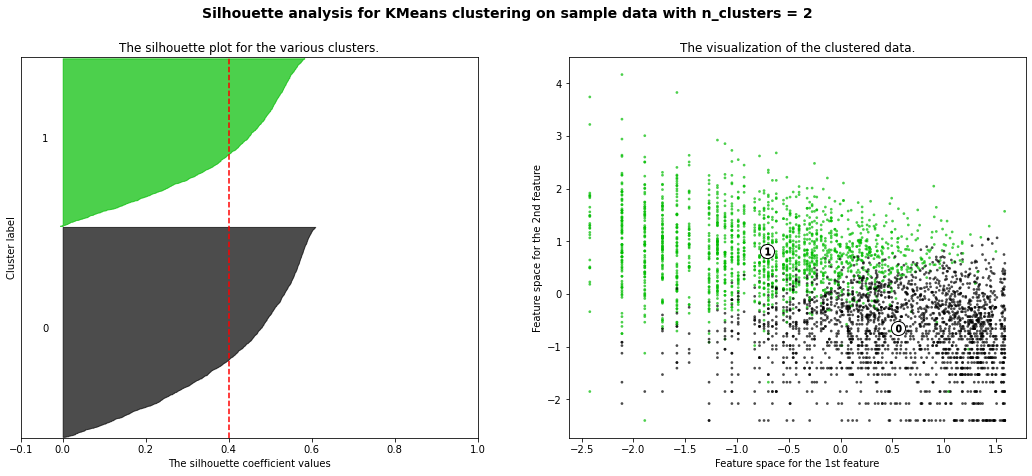

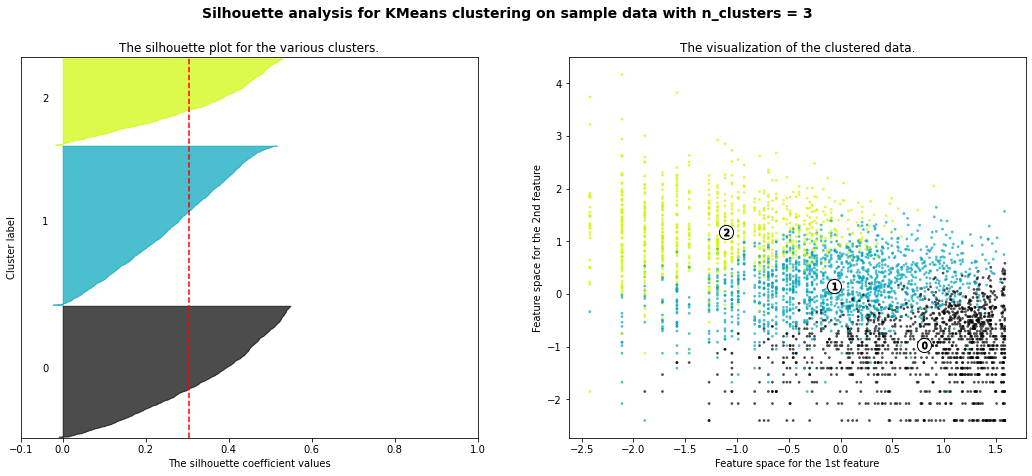

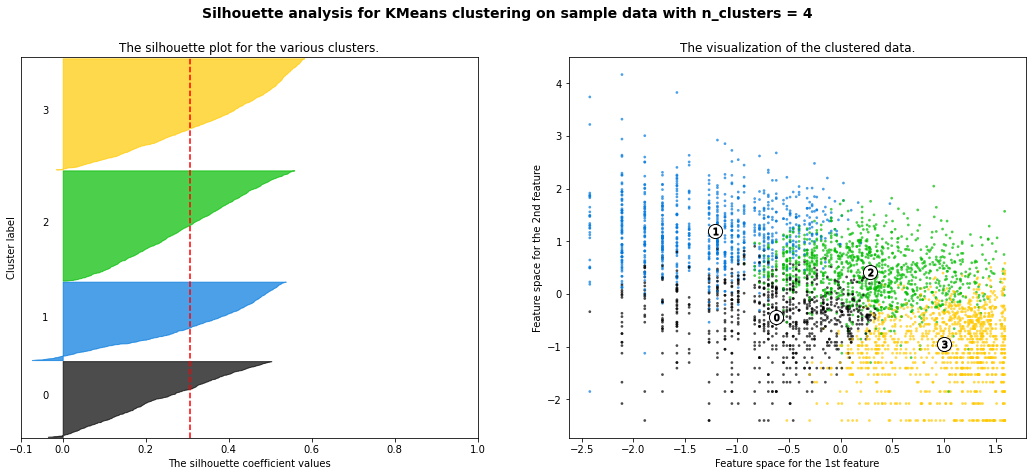

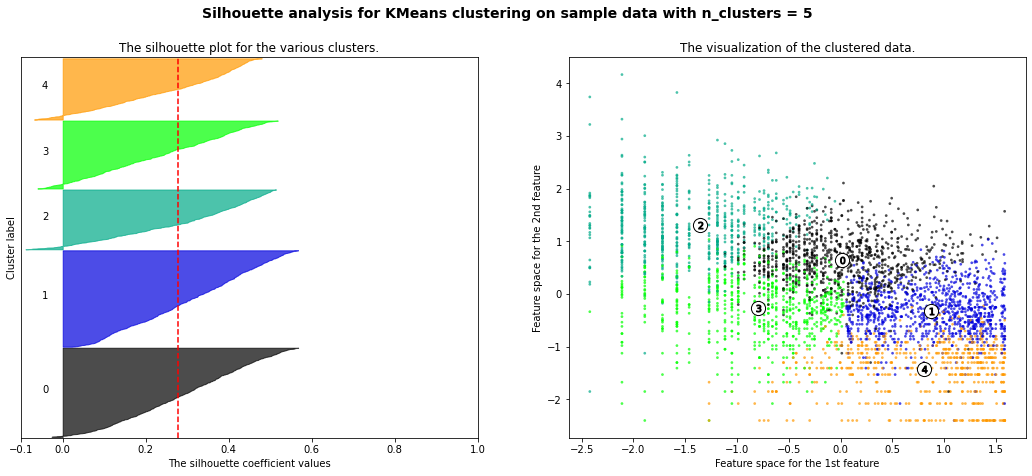

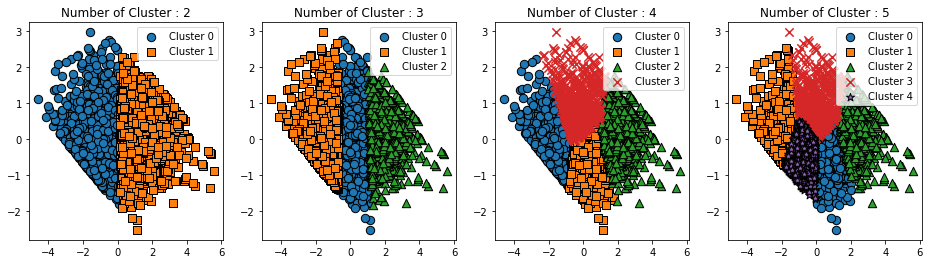

In [219]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)